# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


In [11]:
import numpy as np
import pandas as pd
%matplotlib inline

In [31]:
df = pd.read_csv('train.csv', index_col='ID')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [33]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


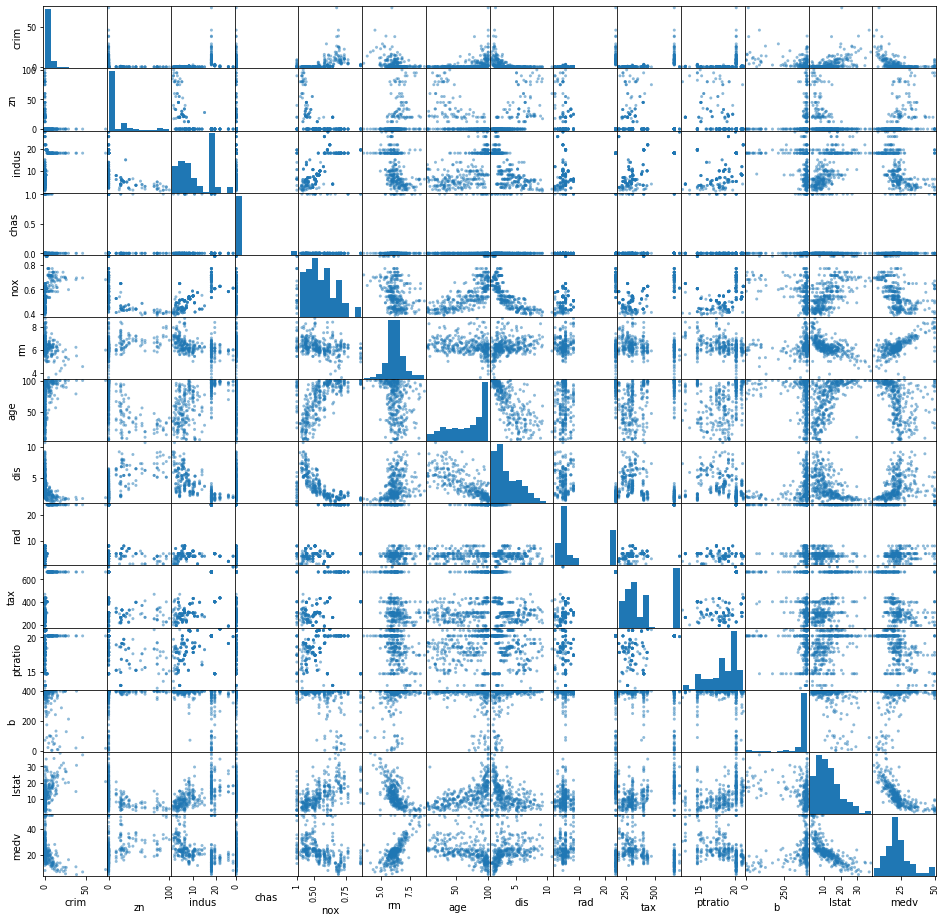

In [34]:
pd.plotting.scatter_matrix(df, figsize=(16, 16));

- crime goes up as medv goes down
- crime goes up when ptratio is 20?
- crime goes up when tax is over 500
- crime goes up as dis goes down
- high age correlates with high crime
- higer nox means more crime
- more crime when chas == 0
- more crime when indus aprox 18
- higher crime when zn is 0
- most crime when id > 400

In [60]:
# df when medv is lower than 20, ptratio is greater than 10, and not next to river
worst_areas = df.loc[(df['medv'] < 20) & (df['ptratio'] > 10) & (df['chas'] == 0), :]

In [61]:
worst_areas.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,6.827515,2.637405,15.192748,0.0,0.619740,5.903214,85.849618,2.897017,13.641221,507.038168,19.564885,321.542901,18.437786,15.216031
std,10.421317,11.555061,6.154137,0.0,0.105177,0.509193,18.497964,1.705211,9.897994,169.637868,1.732314,124.538577,6.362770,3.779170
min,0.013600,0.000000,1.690000,0.0,0.398000,4.138000,18.500000,1.137000,1.000000,188.000000,14.700000,3.500000,7.790000,5.000000
25%,0.237245,0.000000,8.560000,0.0,0.538000,5.654500,82.750000,1.798300,4.000000,364.500000,19.200000,316.535000,14.045000,12.750000
50%,2.379340,0.000000,18.100000,0.0,0.614000,5.942000,93.900000,2.271000,6.000000,469.000000,20.200000,389.960000,17.310000,16.000000
75%,9.557405,0.000000,18.100000,0.0,0.700000,6.224000,97.900000,3.322600,24.000000,666.000000,20.200000,396.900000,21.485000,18.650000
max,73.534100,80.000000,27.740000,0.0,0.871000,7.393000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,19.900000


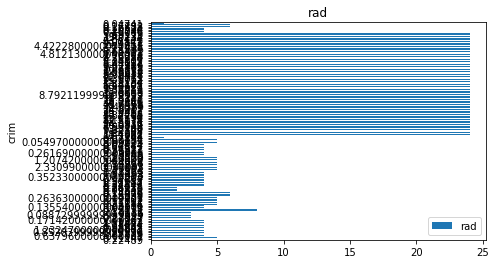

In [93]:
worst_areas.set_index('crim').loc[:, ['rad']].plot.barh(subplots=True);

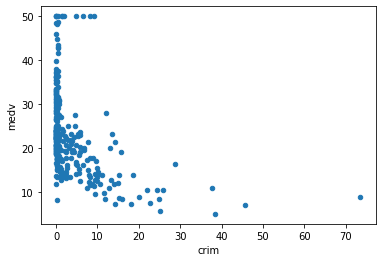

In [36]:
df.loc[:, ['crim', 'medv']].plot.scatter(x='crim', y='medv')

In [69]:
low_crime = df.loc[df['crim'] < 3, ['crim', 'zn', 'indus', 'age', 'dis', 'rad', 'tax', 'lstat', 'medv']]
low_crime.describe()

,crim,zn,indus,age,dis,rad,tax,lstat,medv
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.400919,14.469512,8.880285,60.440650,4.284828,4.630081,319.556911,10.361911,24.837398
std,0.622999,25.333693,6.631329,28.183796,1.982306,2.427174,91.290939,5.736900,8.325843
min,0.006320,0.000000,0.740000,6.000000,1.419100,1.000000,188.000000,1.730000,8.100000
25%,0.056788,0.000000,4.050000,36.650000,2.608500,4.000000,264.000000,6.142500,19.425000
50%,0.137780,0.000000,6.660000,62.100000,3.961150,4.000000,304.500000,9.425000,22.900000
75%,0.386047,21.000000,10.590000,86.450000,5.546050,5.000000,384.000000,13.322500,28.075000
max,2.924000,100.000000,27.740000,100.000000,10.710300,24.000000,711.000000,34.410000,50.000000


In [70]:
high_crime = df.loc[df['crim'] > 3, ['crim', 'zn', 'indus', 'age', 'dis', 'rad', 'tax', 'lstat', 'medv']]
high_crime.describe()

,crim,zn,indus,age,dis,rad,tax,lstat,medv
count,87.000000,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.00000
mean,11.728364,0.0,18.117011,90.241379,2.084371,23.781609,662.977011,18.604713,16.91954
std,10.568099,0.0,0.158673,11.353573,0.581861,2.037014,28.196560,6.950288,8.97416
min,3.163600,0.0,18.100000,48.200000,1.129600,5.000000,403.000000,2.960000,5.00000
25%,5.511105,0.0,18.100000,85.600000,1.630350,24.000000,666.000000,14.065000,11.60000
50%,8.792120,0.0,18.100000,94.500000,1.987900,24.000000,666.000000,18.030000,14.90000
75%,13.717800,0.0,18.100000,98.850000,2.507150,24.000000,666.000000,23.060000,20.05000
max,73.534100,0.0,19.580000,100.000000,3.545900,24.000000,666.000000,37.970000,50.00000


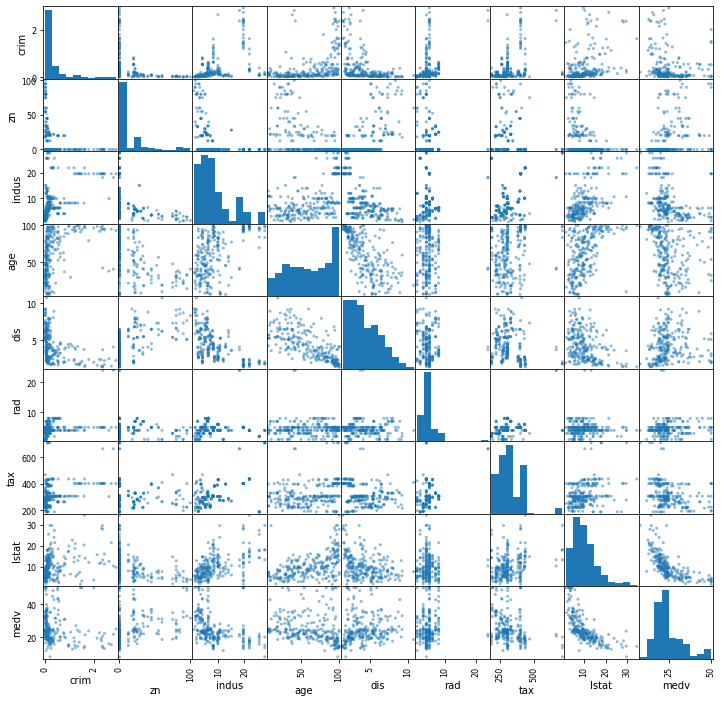

In [71]:
pd.plotting.scatter_matrix(low_crime, figsize=(12, 12));

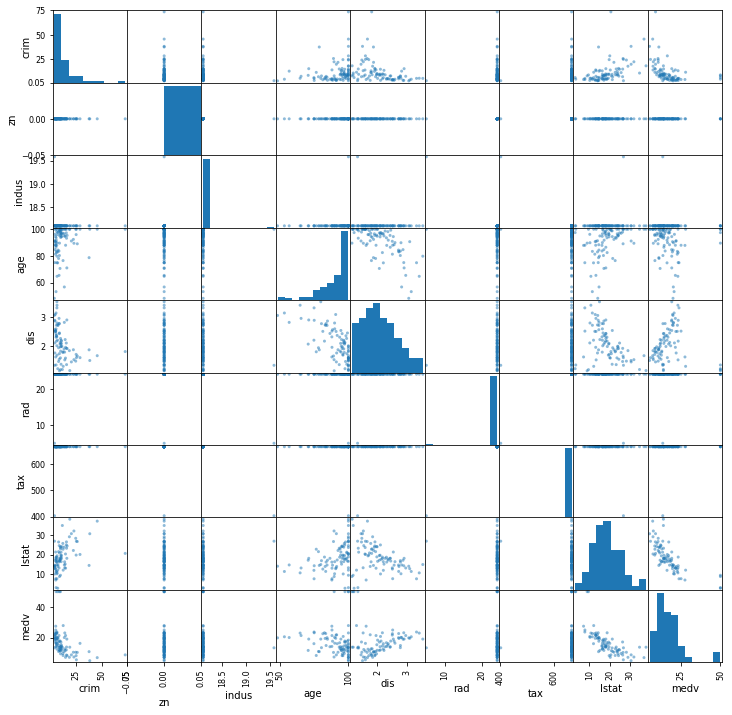

In [72]:
pd.plotting.scatter_matrix(high_crime, figsize=(12, 12));

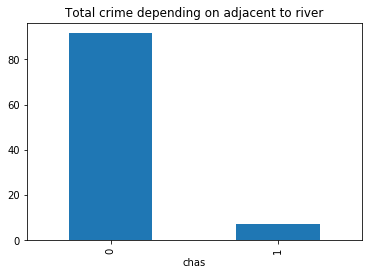

In [68]:
low_crime.groupby('chas').sum().crim.plot.bar(title='Total crime depending on adjacent to river', x='Next to river or not', y='Count')

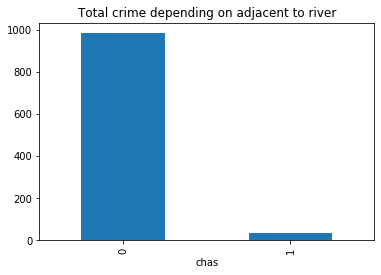

In [64]:
high_crime.groupby('chas').sum().crim.plot.bar(title='Total crime depending on adjacent to river', x='Next to river or not', y='Count')

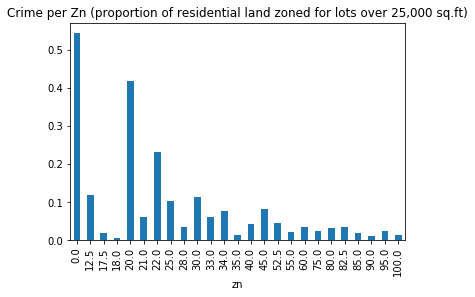

In [79]:
low_crime.groupby('zn').mean().crim.plot.bar(title='Crime per Zn (proportion of residential land zoned for lots over 25,000 sq.ft)');

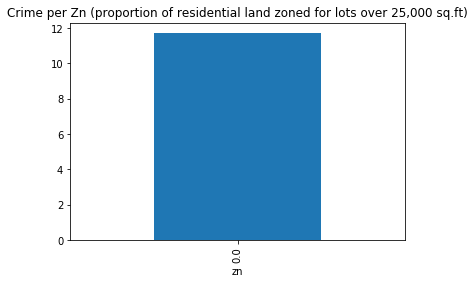

In [81]:
high_crime.groupby('zn').mean().crim.plot.bar(title='Crime per Zn (proportion of residential land zoned for lots over 25,000 sq.ft)');

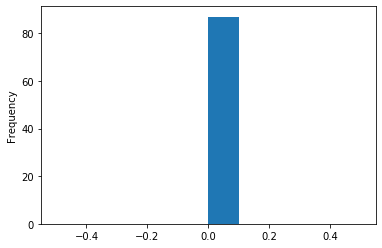

In [83]:
high_crime['zn'].plot.hist()

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!